In [1]:
import numpy as np
import util
import NN

import matplotlib.pyplot as plt
np.random.seed(5)

In [2]:
EPOCHS = 1000

x, y = util.generate_XOR_easy()
layers = [
    NN.FC_layer(2, 32, True),
    NN.relu(),
    NN.FC_layer(32, 32, True),
    NN.relu(),
    NN.FC_layer(32, 1, True),
    NN.sigmoid()
]
DNN = NN.myNN(layers)
loss = NN.MSE()
#opti = NN.optimizer('SGD', 0.01)
#opti = NN.optimizer('momentum', 0.01, {'beta' : 0.9})
#opti = NN.optimizer('adagrad', 0.001, {'epsilon' : 1e-8})
opti = NN.optimizer('adam', 0.001, {'epsilon':1e-8, 'beta1':0.9, 'beta2':0.999})
losses = []

for epoch in range(1, EPOCHS+1):
    y_pred = DNN.forward(x)
    loss_value = loss.forward(y, y_pred)
    losses.append(loss_value)

    dy = loss.backward(y, y_pred)
    DNN.backward(dy, opti)

    if epoch % 20 == 0:
        accuracy = util.accuracy(y, y_pred)
        print(f'epoch: {epoch}, loss: {loss_value}, accuracy: {accuracy}')


epoch: 20, loss: 0.28703047719522484, accuracy: 0.7142857142857143
epoch: 40, loss: 0.25039310344977633, accuracy: 0.7142857142857143
epoch: 60, loss: 0.22049823394784243, accuracy: 0.6666666666666666
epoch: 80, loss: 0.17172219046718032, accuracy: 0.7619047619047619
epoch: 100, loss: 0.11127298602019563, accuracy: 0.8571428571428571
epoch: 120, loss: 0.08230977034605642, accuracy: 0.9047619047619048
epoch: 140, loss: 0.06760410065955297, accuracy: 0.9047619047619048
epoch: 160, loss: 0.05689523015120254, accuracy: 0.9047619047619048
epoch: 180, loss: 0.04961908250961705, accuracy: 0.9523809523809523
epoch: 200, loss: 0.04442073458690323, accuracy: 0.9523809523809523
epoch: 220, loss: 0.04038840225930681, accuracy: 1.0
epoch: 240, loss: 0.03664360813310591, accuracy: 1.0
epoch: 260, loss: 0.03272180838397425, accuracy: 1.0
epoch: 280, loss: 0.029311259781171814, accuracy: 1.0
epoch: 300, loss: 0.027239467370927854, accuracy: 1.0
epoch: 320, loss: 0.025482810719747784, accuracy: 1.0
epo

[[0.01973384]
 [0.99999768]
 [0.02910483]
 [0.99995423]
 [0.03735223]
 [0.9991736 ]
 [0.06096234]
 [0.9856967 ]
 [0.10603219]
 [0.80138204]
 [0.16922628]
 [0.12033138]
 [0.8126978 ]
 [0.07414631]
 [0.98438331]
 [0.04488514]
 [0.99608391]
 [0.02775896]
 [0.99842773]
 [0.02369401]
 [0.99942711]]


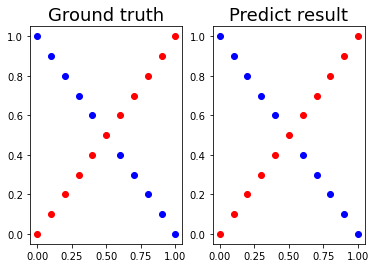

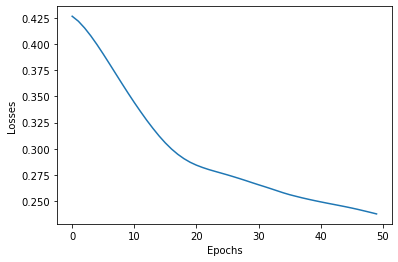

In [3]:
print(y_pred)
y_pred = np.around(y_pred)
util.show_result(x, y, y_pred)
plt.xlabel('Epochs')
plt.ylabel('Losses')
plt.plot(losses[0:50])
plt.show()
